### Description of Dataset<br> 
This dataset is data used to predict bank customer churning. Churn is the degree of customer disengagement over a certain amount of time. This data uses customers information including their credit score, age, gender, balance, estimated salary etc. to predict churning. <br>
### Give the URL of where to find the dataset and explain how to download it<br>
The link for this dataset is: https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data.<br> 
You download it by clicking on the little download icon in the top right corner.<br>
### Give at least two interesting questions you have about the data <br>
1) Blah?
2) Blah?



In [80]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# load the data into a pandas dataframe
df = pd.read_csv('../cs103a-cpa0/Churn_Modelling.csv', delimiter=',')
# drop the RowNumber, CustomerId, and Surname, since these are not interesting information to analyze.
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [82]:
# use pd.describe() to get a rough overview of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [83]:
# analyze your data using the following features
# 1. print the array of columns and the index array
print (df.columns)
print(df.index)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
RangeIndex(start=0, stop=10000, step=1)


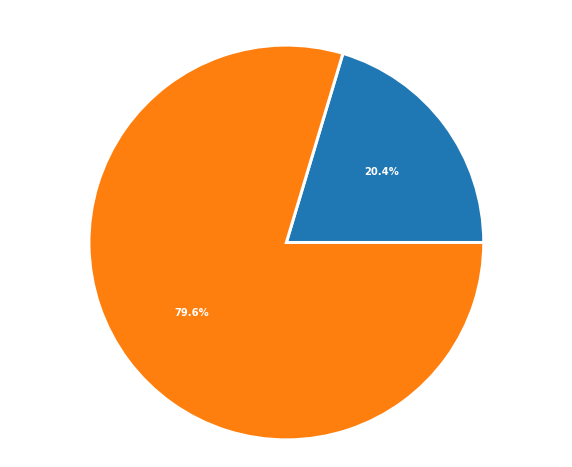

In [84]:
# 2. create some simple plot of part of the data

labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), 
    df.Exited[df['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
patches, texts, pcts = ax1.pie(sizes, labels = labels, 
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    autopct='%.1f%%')
ax1.axis('equal')
plt.setp(pcts, color='white', fontweight='bold')
for i, patch in enumerate(patches):
  texts[i].set_color("white")
plt.title("Customers churned vs Customers retained", size = 15, 
    color = 'white')
plt.show()

In [91]:
# 3. create a pivot table and plot some data from that pivot table
pd.pivot_table(data=df, index=['Geography', 'Gender'], columns = ['EstimatedSalary'], values='CreditScore', aggfunc=np.mean).plot

<AxesSubplot:xlabel='Geography,Gender'>

ValueError: Image size of 393x150022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [86]:
# 4. use the groupby feature